# Census Data Exploration

<b>Authored by Ainsleigh Douglas</b>

Through exploring population demographics, twitter sentiments, and gun incident rates in Illinois and Texas we aim to learn if the political environment instigates higher gun incidents and what socioeconomic elements may contribute.


a. In what ways do Twitter sentiments and Twitter interactions during election years contribute to the magnitude of gun-related incidents in the US?

b. Is an increase in gun incidents during election years?

c. How may socioeconomic status may contribute?



<b>Data</b>

This data set is the 2019 census report of education status and income of the people who reside in Illinois and Texas. 

## Importing

I will import pandas in order to do general wrangling tasks, geopandas to read and create visualizations of spatial data, contextily to have the otion of constructing basemaps, matplotlib.pyplot to have a greater capabilities of the plots.

In [57]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

Now I load the geojson files, of Illinois's income and education census data as well as Texas's income and education census data, that will let me do “spatial data exploration” and I assign each to variables to make it easier to reference.

In [58]:
illinoisInc = gpd.read_file('acs2019_5yr_B19001_05000US17181.geojson')
illinoisEdu = gpd.read_file('acs2019_5yr_B15002_05000US17021.geojson')
texasInc = gpd.read_file('acs2019_5yr_B19001_05000US48191.geojson')
texasEdu = gpd.read_file('acs2019_5yr_B15002_05000US48289.geojson')

## Cleaning

Row 0 and 1 should not be there, Illinois and United States are both outliers because they dont refer to a county so I'm going to remove it so it doesn't skew any of my visualizations. I will use the .drop command I can remove the rows.

In [59]:
illinoisEdu = illinoisEdu.drop([0])
illinoisEdu = illinoisEdu.drop([1])
illinoisEdu.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
2,05000US17001,"Adams County, IL",46125.0,131.0,22204.0,82.0,160.0,80.0,31.0,37.0,...,258.0,3851.0,354.0,2065.0,262.0,155.0,65.0,85.0,53.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",4497.0,55.0,2085.0,56.0,17.0,14.0,0.0,16.0,...,100.0,236.0,70.0,50.0,35.0,9.0,12.0,0.0,16.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",11741.0,300.0,6036.0,287.0,50.0,30.0,0.0,18.0,...,135.0,901.0,161.0,479.0,135.0,12.0,15.0,36.0,35.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
5,05000US17007,"Boone County, IL",35008.0,175.0,17144.0,140.0,311.0,143.0,278.0,172.0,...,292.0,2855.0,394.0,1198.0,236.0,180.0,86.0,105.0,79.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
6,05000US17009,"Brown County, IL",4863.0,167.0,3119.0,216.0,22.0,23.0,0.0,16.0,...,48.0,258.0,68.0,75.0,37.0,4.0,7.0,8.0,11.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


Using .head() I was able to check to see if the first two cells were removed. Now I will create a list of columns that I’ll keep. Which are males that have a highschool degree, females that have a highschool degree, males that have a bachelor degree, and females that have a bachelor degree.

In [60]:
list(illinoisEdu)
columns_to_keep = ['geoid',
'name',
'B15002001',
'B15002011',
'B15002015',
'B15002028',
'B15002032',
'geometry']
illinoisEdu = illinoisEdu[columns_to_keep]

Using the metadata file I was able to associate the numerical vaules with the appropriate columns I wanted to keep. Now I replace the values with the appropriate column names by using the command .columns. Then I check again if it has been updated using .head()

In [61]:
illinoisEdu.columns= ['geoid',
'name',
'Total',
'males with HS degree',
'males with BA degree',
'females with HS degree',
'females with BA degree',
'geometry']
illinoisEdu.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry
2,05000US17001,"Adams County, IL",46125.0,8333.0,3483.0,8002.0,3851.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",4497.0,858.0,211.0,974.0,236.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",11741.0,2207.0,741.0,1681.0,901.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
5,05000US17007,"Boone County, IL",35008.0,6113.0,2168.0,6079.0,2855.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
6,05000US17009,"Brown County, IL",4863.0,1262.0,242.0,563.0,258.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


.head() has shown that the top five rows has updated accordingly. Now I will normalize the raw data and add colums to my data that give %’s of each education level.

In [62]:
illinoisEdu['percent males with HS degree'] = illinoisEdu['males with HS degree']/illinoisEdu['Total']*100
illinoisEdu['percent males with BA degree'] = illinoisEdu['males with BA degree']/illinoisEdu['Total']*100
illinoisEdu['percent females with HS degree'] = illinoisEdu['females with HS degree']/illinoisEdu['Total']*100
illinoisEdu['percent females with BA degree'] = illinoisEdu['females with BA degree']/illinoisEdu['Total']*100

## Mapping!

Using the .subplots command to create multiple plots. I add argument to clarify that I will want one row of two plots (so they're side by side). I also set the figure's size. I then name each subplot (ex: ax1). for the first map, starting on the left I plot the column for percent males with HS degree, and set additional arguments to make it in shades of blue, in quantiles, and have a legend. I also make sure to name that plot percent males with HS degree. I do the same for the second plot but make sure I use the column for percent males with HS degree and that I title it that. I have to make sure I also assign the map to the correct subplot by making ax = ax1.

Text(0.5, 1.0, 'percent males with BA degree')

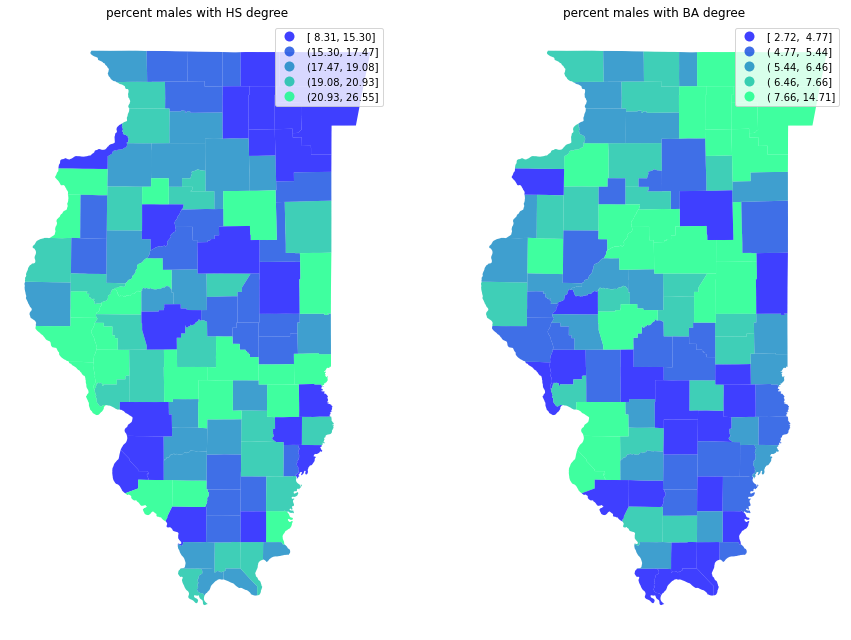

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

illinoisEdu.plot(column='percent males with HS degree', 
            cmap='winter', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("percent males with HS degree")


illinoisEdu.plot(column='percent males with BA degree', 
            cmap='winter', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("percent males with BA degree")

The resulting maps show the highest concentration of males with a HS degree and BA degree using bright green and the lowest concentration with dark blue. Next I will repeat the same process with female HS and BA degrees.

Text(0.5, 1.0, 'percent females with BA degree')

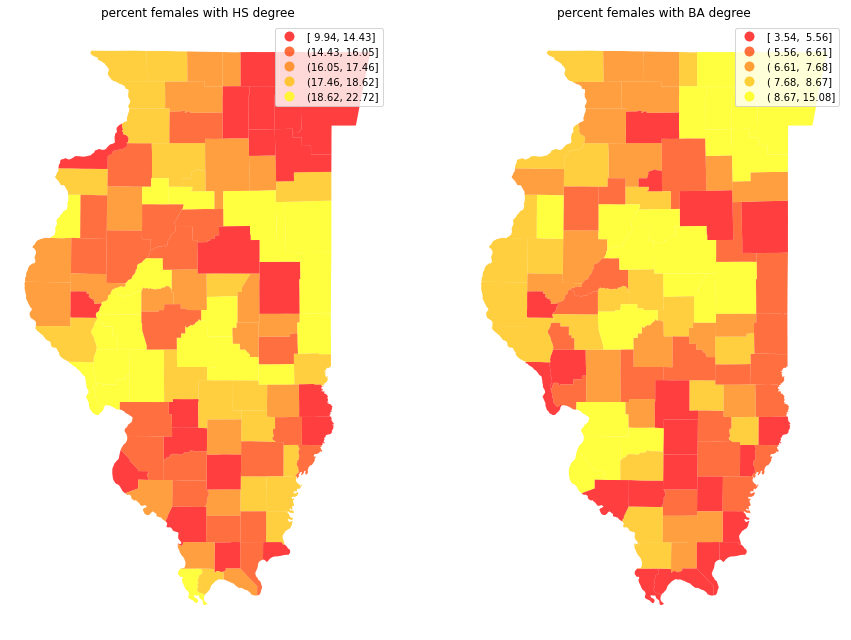

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

illinoisEdu.plot(column='percent females with HS degree', 
            cmap='autumn', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("percent females with HS degree")


illinoisEdu.plot(column='percent females with BA degree', 
            cmap='autumn', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("percent females with BA degree")

These maps show the highest concentration of females with a HS degree and BA degree using bright yellow and the lowest concentration with red.

## Repeat

Now I will repeat the exact process of cleaning and mapping the data but instead using the <b>Texas</b> education and income data. 

Drop the first to rows to avoid outliers

In [65]:
texasEdu = texasEdu.drop([0])
texasEdu = texasEdu.drop([1])
texasEdu.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
2,05000US48001,"Anderson County, TX",42073.0,233.0,26707.0,179.0,215.0,83.0,206.0,83.0,...,254.0,1359.0,282.0,660.0,145.0,36.0,32.0,47.0,40.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",10700.0,158.0,5389.0,68.0,157.0,84.0,104.0,76.0,...,145.0,488.0,178.0,202.0,112.0,47.0,67.0,0.0,21.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",57275.0,48.0,27523.0,63.0,666.0,196.0,255.0,115.0,...,388.0,3469.0,392.0,1594.0,288.0,185.0,86.0,71.0,48.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",17878.0,499.0,8572.0,379.0,95.0,68.0,101.0,88.0,...,213.0,1326.0,302.0,513.0,176.0,117.0,103.0,66.0,53.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",6137.0,36.0,3000.0,35.0,2.0,3.0,28.0,22.0,...,95.0,560.0,100.0,185.0,61.0,66.0,40.0,20.0,17.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Removing all columns except for the columns with males that have a highschool degree, females that have a highschool degree, males that have a bachelor degree, and females that have a bachelor degree.

In [66]:
list(texasEdu)
columns_to_keep = ['geoid',
'name',
'B15002001',
'B15002011',
'B15002015',
'B15002028',
'B15002032',
'geometry']
texasEdu = texasEdu[columns_to_keep]

Renaming the columns to legible titles

In [67]:
texasEdu.columns= ['geoid',
'name',
'Total',
'males with HS degree',
'males with BA degree',
'females with HS degree',
'females with BA degree',
'geometry']
texasEdu.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry
2,05000US48001,"Anderson County, TX",42073.0,10778.0,1511.0,5583.0,1359.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",10700.0,2136.0,326.0,1603.0,488.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",57275.0,9688.0,2944.0,8390.0,3469.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",17878.0,2590.0,1097.0,2990.0,1326.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",6137.0,1188.0,435.0,987.0,560.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Normalize the raw data and add colums to my data that give %’s of each education level.

In [68]:
texasEdu['percent males with HS degree'] = texasEdu['males with HS degree']/texasEdu['Total']*100
texasEdu['percent males with BA degree'] = texasEdu['males with BA degree']/texasEdu['Total']*100
texasEdu['percent females with HS degree'] = texasEdu['females with HS degree']/texasEdu['Total']*100
texasEdu['percent females with BA degree'] = texasEdu['females with BA degree']/texasEdu['Total']*100

Mapping the percent of males with HS degree and comparing that to the percent of males with a BA degree.

Text(0.5, 1.0, 'percent males with BA degree')

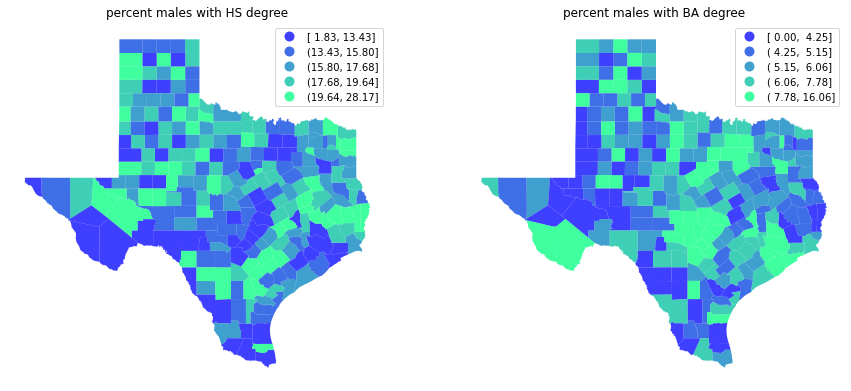

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

texasEdu.plot(column='percent males with HS degree', 
            cmap='winter', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("percent males with HS degree")


texasEdu.plot(column='percent males with BA degree', 
            cmap='winter', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("percent males with BA degree")

Mapping the percent of females with HS degree and comparing that to the percent of males with a BA degree.

Text(0.5, 1.0, 'percent females with BA degree')

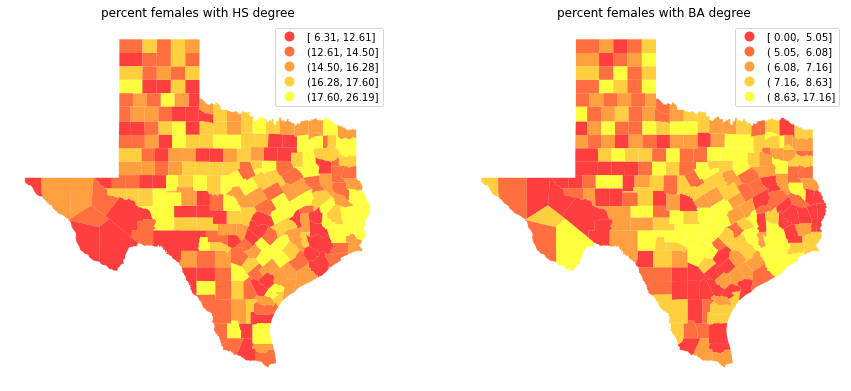

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

texasEdu.plot(column='percent females with HS degree', 
            cmap='autumn', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("percent females with HS degree")


texasEdu.plot(column='percent females with BA degree', 
            cmap='autumn', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("percent females with BA degree")

##  Repeat with Income data!

Now I will begin a comparative exploration of the data related to income for both Illinois and Texas.

Drop the first to rows to avoid outliers

In [71]:
illinoisInc = illinoisInc.drop([0])
illinoisInc = illinoisInc.drop([1])
illinoisInc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
2,05000US17001,"Adams County, IL",27112.0,358.0,1547.0,262.0,881.0,182.0,1692.0,263.0,...,326.0,2219.0,250.0,1203.0,210.0,1093.0,174.0,992.0,198.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",2154.0,161.0,240.0,70.0,169.0,63.0,149.0,53.0,...,60.0,52.0,31.0,44.0,27.0,56.0,36.0,9.0,11.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",6299.0,360.0,467.0,145.0,277.0,116.0,358.0,133.0,...,176.0,634.0,144.0,306.0,85.0,280.0,85.0,207.0,81.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
5,05000US17007,"Boone County, IL",18571.0,424.0,703.0,234.0,621.0,187.0,531.0,162.0,...,292.0,1962.0,291.0,1441.0,316.0,1143.0,210.0,1356.0,258.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
6,05000US17009,"Brown County, IL",2055.0,162.0,86.0,31.0,142.0,48.0,84.0,49.0,...,67.0,249.0,68.0,107.0,49.0,94.0,55.0,45.0,34.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


Keep the colums associated with the different levels of income.

In [72]:
list(illinoisInc)
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']
illinoisInc = illinoisInc[columns_to_keep]

Assign the numerical values a variable associated with their meaning.

In [73]:
illinoisInc.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
 '40,000 to $44,999',
 '45,000 to $49,999',
 '50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
 '150,000 to $199,999',
 '$200,000 or more',
 'geometry']
illinoisInc.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999","40,000 to $44,999","45,000 to $49,999","50,000 to $59,999","60,000 to $74,999","75,000 to $99,999","100,000 to $124,999","$125,000 to $149,999","150,000 to $199,999","$200,000 or more",geometry
2,05000US17001,"Adams County, IL",27112.0,1547.0,881.0,1692.0,1276.0,1518.0,1511.0,1674.0,1331.0,1188.0,2446.0,2965.0,3576.0,2219.0,1203.0,1093.0,992.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
3,05000US17003,"Alexander County, IL",2154.0,240.0,169.0,149.0,182.0,166.0,119.0,131.0,142.0,94.0,255.0,144.0,202.0,52.0,44.0,56.0,9.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
4,05000US17005,"Bond County, IL",6299.0,467.0,277.0,358.0,298.0,232.0,178.0,279.0,262.0,332.0,579.0,569.0,1041.0,634.0,306.0,280.0,207.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
5,05000US17007,"Boone County, IL",18571.0,703.0,621.0,531.0,988.0,857.0,975.0,592.0,708.0,662.0,1505.0,2093.0,2434.0,1962.0,1441.0,1143.0,1356.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
6,05000US17009,"Brown County, IL",2055.0,86.0,142.0,84.0,135.0,82.0,47.0,96.0,89.0,47.0,150.0,286.0,316.0,249.0,107.0,94.0,45.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


Normalize the raw data and add colums to my data that give %’s of each income level.

In [74]:
illinoisInc['Percent Less than $10,000'] = illinoisInc['Less than $10,000']/illinoisInc['Total']*100
illinoisInc['Percent 10,000 to $14,999'] = illinoisInc['10,000 to $14,999']/illinoisInc['Total']*100
illinoisInc['Percent 15,000 to $19,999'] = illinoisInc['15,000 to $19,999']/illinoisInc['Total']*100
illinoisInc['Percent 20,000 to $24,999'] = illinoisInc['20,000 to $24,999']/illinoisInc['Total']*100 
illinoisInc['Percent 30,000 to $34,999'] = illinoisInc['30,000 to $34,999']/illinoisInc['Total']*100
illinoisInc['Percent 35,000 to $39,999'] = illinoisInc['35,000 to $39,999']/illinoisInc['Total']*100
illinoisInc['Percent 40,000 to $44,999'] = illinoisInc['40,000 to $44,999']/illinoisInc['Total']*100 
illinoisInc['Percent 45,000 to $49,999'] = illinoisInc['45,000 to $49,999']/illinoisInc['Total']*100
illinoisInc['Percent 50,000 to $59,999'] = illinoisInc['50,000 to $59,999']/illinoisInc['Total']*100
illinoisInc['Percent 60,000 to $74,999'] = illinoisInc['60,000 to $74,999']/illinoisInc['Total']*100
illinoisInc['Percent 75,000 to $99,999'] = illinoisInc['75,000 to $99,999']/illinoisInc['Total']*100 
illinoisInc['Percent 100,000 to $124,999'] = illinoisInc['100,000 to $124,999']/illinoisInc['Total']*100
illinoisInc['Percent $125,000 to $149,999'] = illinoisInc['$125,000 to $149,999']/illinoisInc['Total']*100 
illinoisInc['Percent 150,000 to $199,999'] = illinoisInc['150,000 to $199,999']/illinoisInc['Total']*100
illinoisInc['Percent $200,000 or more'] = illinoisInc['$200,000 or more']/illinoisInc['Total']*100 

Mapping the percent of people in illinois making less than 10,000 dollars and comparing that to the percent of people in Illinois making more than $200,000

Text(0.5, 1.0, 'Percent $200,000 or more')

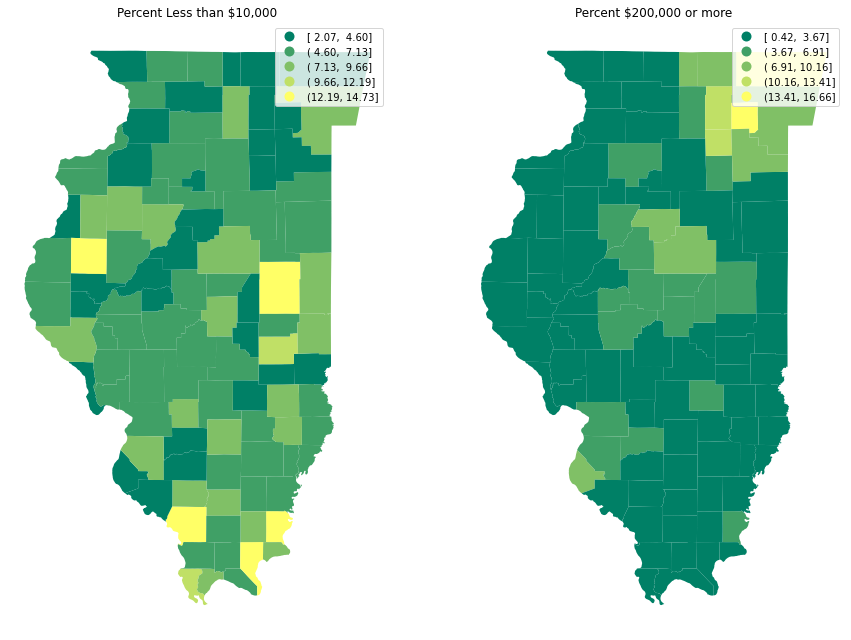

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

illinoisInc.plot(column='Percent Less than $10,000', 
            cmap= 'summer', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Less than $10,000")

illinoisInc.plot(column='Percent $200,000 or more', 
            cmap= 'summer', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent $200,000 or more")

## Repeat the process with the Texas income data

Remove the rows with outliers

In [76]:
texasInc = texasInc.drop([0])
texasInc = texasInc.drop([1])
texasInc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
2,05000US48001,"Anderson County, TX",16677.0,414.0,861.0,226.0,1302.0,276.0,1259.0,232.0,...,277.0,943.0,203.0,574.0,202.0,411.0,127.0,242.0,83.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,191.0,272.0,106.0,188.0,86.0,146.0,85.0,...,238.0,573.0,177.0,473.0,170.0,401.0,141.0,425.0,112.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,619.0,2102.0,314.0,1738.0,297.0,1890.0,334.0,...,541.0,2283.0,308.0,1068.0,268.0,1203.0,209.0,688.0,169.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",9548.0,501.0,854.0,290.0,557.0,181.0,450.0,153.0,...,237.0,731.0,178.0,345.0,180.0,379.0,130.0,581.0,209.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",3452.0,114.0,158.0,52.0,209.0,88.0,169.0,51.0,...,77.0,359.0,89.0,240.0,62.0,208.0,62.0,207.0,70.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Keep the colums associated with the different levels of income.

In [77]:
list(texasInc)
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']
texasInc = texasInc[columns_to_keep]

Assign the numerical values a variable associated with their meaning.

In [78]:
texasInc.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
 '40,000 to $44,999',
 '45,000 to $49,999',
 '50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
 '150,000 to $199,999',
 '$200,000 or more',
 'geometry']
texasInc.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999","40,000 to $44,999","45,000 to $49,999","50,000 to $59,999","60,000 to $74,999","75,000 to $99,999","100,000 to $124,999","$125,000 to $149,999","150,000 to $199,999","$200,000 or more",geometry
2,05000US48001,"Anderson County, TX",16677.0,861.0,1302.0,1259.0,1118.0,897.0,1218.0,1171.0,814.0,734.0,1588.0,1714.0,1831.0,943.0,574.0,411.0,242.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,272.0,188.0,146.0,114.0,293.0,212.0,165.0,355.0,125.0,332.0,496.0,1003.0,573.0,473.0,401.0,425.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,2102.0,1738.0,1890.0,1915.0,2381.0,1466.0,1336.0,1206.0,1358.0,2980.0,3215.0,4206.0,2283.0,1068.0,1203.0,688.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",9548.0,854.0,557.0,450.0,578.0,666.0,550.0,677.0,425.0,474.0,589.0,707.0,985.0,731.0,345.0,379.0,581.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",3452.0,158.0,209.0,169.0,184.0,166.0,196.0,124.0,93.0,125.0,196.0,376.0,442.0,359.0,240.0,208.0,207.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Normalize the raw data and add colums to my data that give %’s of each income level.

In [79]:
texasInc['Percent Less than $10,000'] = texasInc['Less than $10,000']/texasInc['Total']*100
texasInc['Percent 10,000 to $14,999'] = texasInc['10,000 to $14,999']/texasInc['Total']*100
texasInc['Percent 15,000 to $19,999'] = texasInc['15,000 to $19,999']/texasInc['Total']*100
texasInc['Percent 20,000 to $24,999'] = texasInc['20,000 to $24,999']/texasInc['Total']*100 
texasInc['Percent 30,000 to $34,999'] = texasInc['30,000 to $34,999']/texasInc['Total']*100
texasInc['Percent 35,000 to $39,999'] = texasInc['35,000 to $39,999']/texasInc['Total']*100
texasInc['Percent 40,000 to $44,999'] = texasInc['40,000 to $44,999']/texasInc['Total']*100 
texasInc['Percent 45,000 to $49,999'] = texasInc['45,000 to $49,999']/texasInc['Total']*100
texasInc['Percent 50,000 to $59,999'] = texasInc['50,000 to $59,999']/texasInc['Total']*100
texasInc['Percent 60,000 to $74,999'] = texasInc['60,000 to $74,999']/texasInc['Total']*100
texasInc['Percent 75,000 to $99,999'] = texasInc['75,000 to $99,999']/texasInc['Total']*100 
texasInc['Percent 100,000 to $124,999'] = texasInc['100,000 to $124,999']/texasInc['Total']*100
texasInc['Percent $125,000 to $149,999'] = texasInc['$125,000 to $149,999']/texasInc['Total']*100 
texasInc['Percent 150,000 to $199,999'] = texasInc['150,000 to $199,999']/texasInc['Total']*100
texasInc['Percent $200,000 or more'] = texasInc['$200,000 or more']/texasInc['Total']*100 

Mapping the percent of people in Texas making less than 10,000 dollars and comparing that to the percent of people in Texas making more than $200,000

Text(0.5, 1.0, 'Percent $200,000 or more')

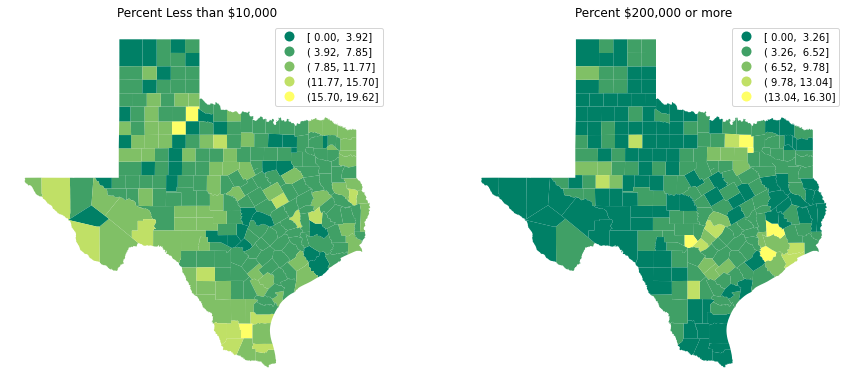

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

texasInc.plot(column='Percent Less than $10,000', 
            cmap= 'summer', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Less than $10,000")

texasInc.plot(column='Percent $200,000 or more', 
            cmap= 'summer', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent $200,000 or more")

## Group Contribution

Stacy and I (Ainsleigh) divided the labor by splitting up the visualizations. Stacy created the chart visualizations and bar graphs for gun violence incidents in the US. I created maps to correlate socioeconomic status of people living within the US, specifically Texas and Illinois, to levels of gun related incidents. 